<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/iris_classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing, splitting



---


    0: setosa


    1: versicolor


    2: virginica



---








In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = sklearn.datasets.load_iris(return_X_y=False, as_frame=False)

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
X = data.data
y = data.target
names = data.target_names

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Species'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


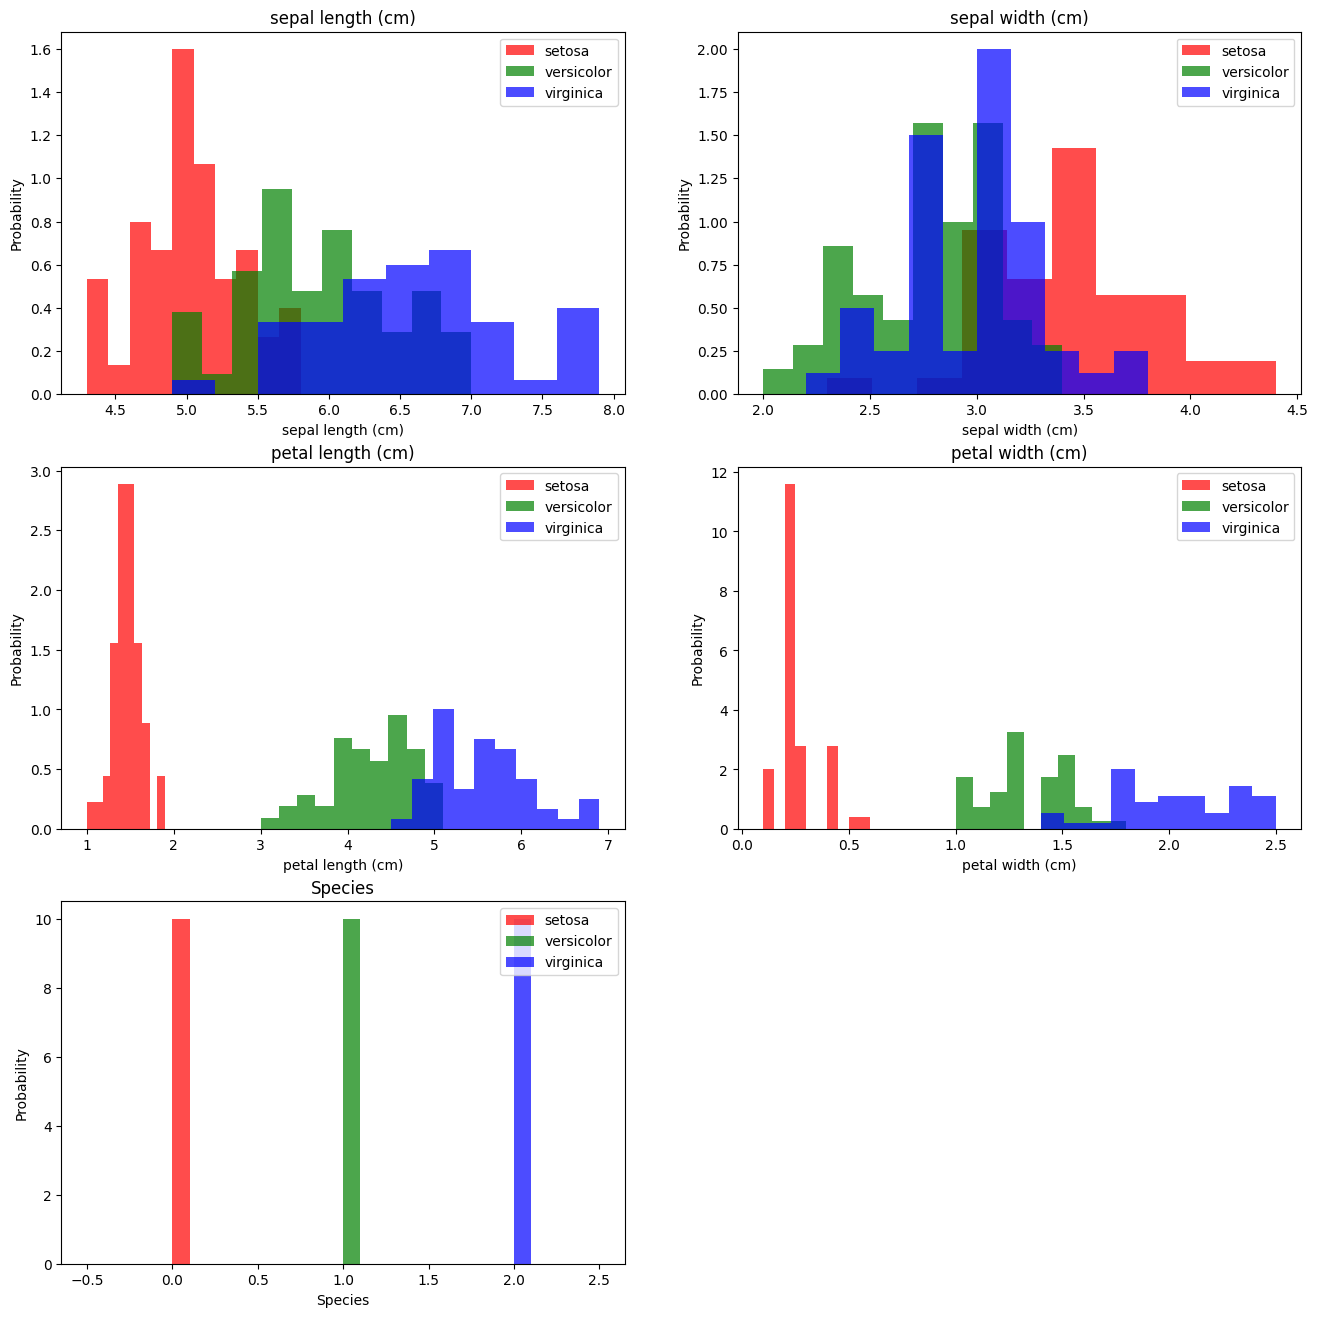

In [6]:
fig = plt.figure(figsize=(16,16))
count = 1
for i in df.columns:
    plt.subplot(3,2,count)
    plt.hist(df[df['Species'] == 0][i], label='setosa', alpha=0.7, color = 'red', density=True)
    plt.hist(df[df['Species'] == 1][i], label='versicolor', alpha=0.7, color = 'green', density=True)
    plt.hist(df[df['Species'] == 2][i], label='virginica', alpha=0.7, color = 'blue', density=True)

    plt.title(i)

    plt.xlabel(i)
    plt.legend()
    plt.ylabel('Probability')
    count += 1
plt.show()


[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>]

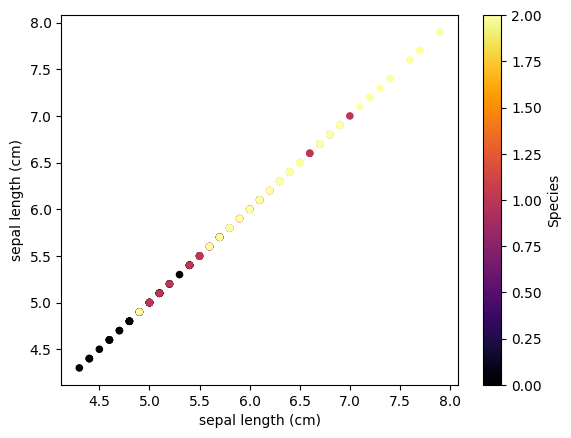

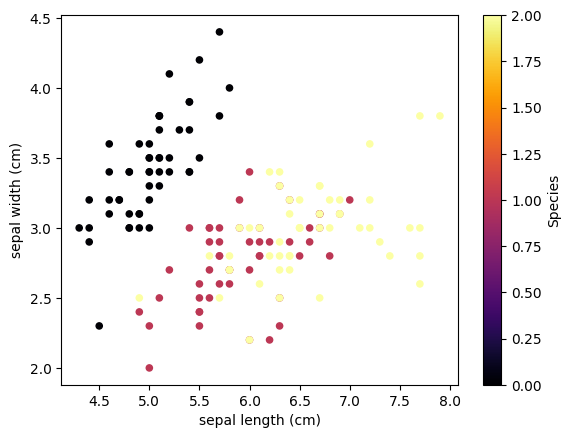

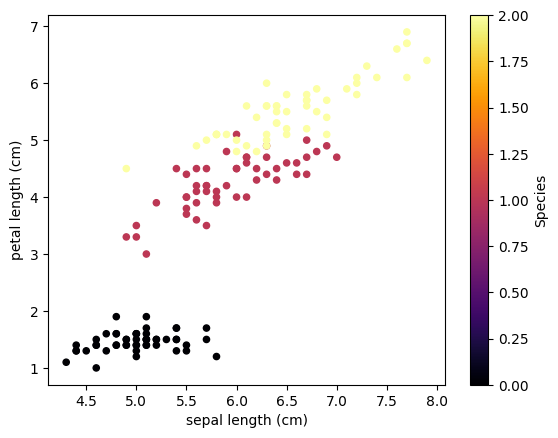

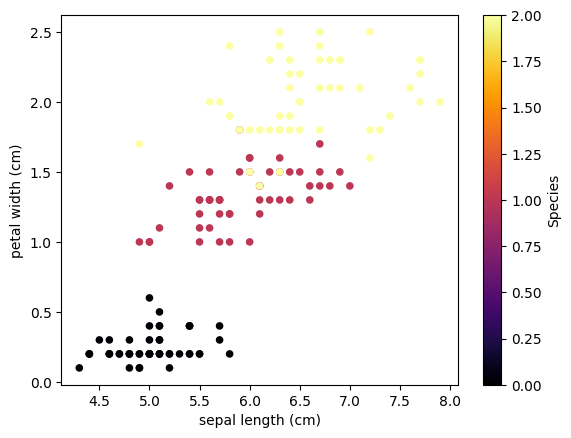

In [7]:
[df.plot.scatter(df.columns[0], df.columns[i], c='Species',colormap='inferno', ) for i in range(4)]

<Axes: >

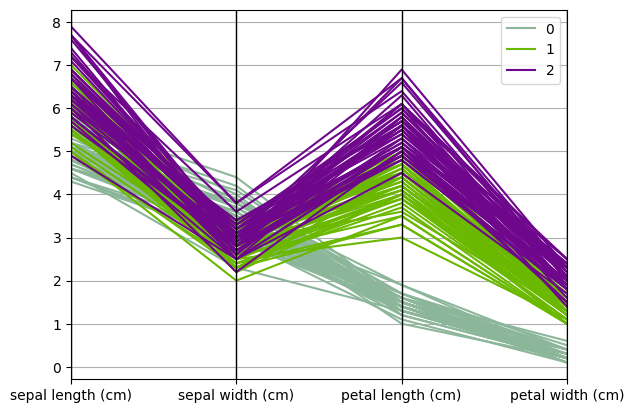

In [8]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "Species", )

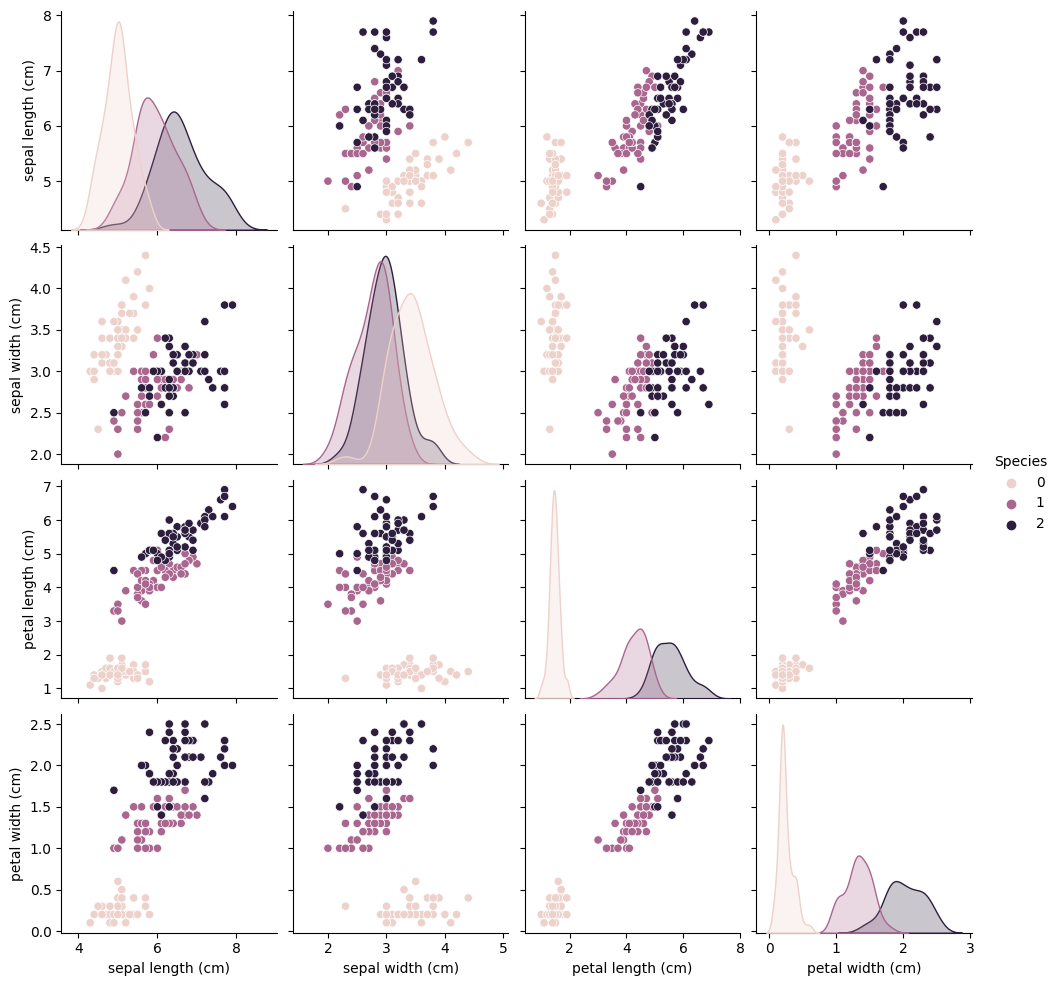

In [9]:
import seaborn as sns

sns.pairplot(data=df,hue='Species',diag_kind='kde')

In [28]:
train, test = train_test_split(df, test_size = 0.3, shuffle = True)

In [29]:
train['Species']

29     0
78     1
145    2
98     1
22     0
      ..
25     0
103    2
81     1
90     1
126    2
Name: Species, Length: 105, dtype: int64

In [30]:
train_X = train.drop('Species', axis=1)
train_y = train['Species']

In [31]:
test_X = test.drop('Species', axis=1)
test_y = test['Species']

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=8)
model.fit(train_X,train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8)

In [34]:
y_pred = model.predict(test_X)
(y_pred == test_y)[:20]

6      True
72     True
38     True
37     True
50     True
3      True
128    True
113    True
96     True
0      True
92     True
9      True
48     True
107    True
111    True
16     True
45     True
104    True
11     True
40     True
Name: Species, dtype: bool

In [35]:
for i in range(7,17):
    model = KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    print(f'{i} neighbors: ', '\n', classification_report(test_y, y_pred, digits=4))

7 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     0.9167    0.9167    0.9167        12
           2     0.9286    0.9286    0.9286        14

    accuracy                         0.9556        45
   macro avg     0.9484    0.9484    0.9484        45
weighted avg     0.9556    0.9556    0.9556        45

8 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     0.9167    0.9167    0.9167        12
           2     0.9286    0.9286    0.9286        14

    accuracy                         0.9556        45
   macro avg     0.9484    0.9484    0.9484        45
weighted avg     0.9556    0.9556    0.9556        45

9 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     1.0000    0.9167    0.9565        12
           2     0.9333    

*9 neighbors seems like the best choice.*

In [39]:
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

In [40]:
print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     1.0000    0.9167    0.9565        12
           2     0.9333    1.0000    0.9655        14

    accuracy                         0.9778        45
   macro avg     0.9778    0.9722    0.9740        45
weighted avg     0.9793    0.9778    0.9777        45



In [89]:
#Checking which prediction is wrong
test[y_pred != test_y]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
70,5.9,3.2,4.8,1.8,1


In [62]:
y_pred

array([0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1,
       1])

In [74]:
test.shape

(45, 5)

In [66]:
test[test.index == 70].index

Int64Index([70], dtype='int64')

In [90]:
test.insert(test.shape[1], 'predicted', y_pred)

In [91]:
test[test.index==70]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,predicted
70,5.9,3.2,4.8,1.8,1,2


In [ ]:
# It is prediction with index 70. Should have been 1 (virginica), but the model predicted 2 (versicolor).